<a href="https://colab.research.google.com/github/harsh194/machine_learning/blob/main/K_means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import os
new_directory = '/content/drive/MyDrive/Harsh/Unsupervised Learning/Week 1'
os.chdir(new_directory)

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from utils import*
%matplotlib inline

In [5]:
def find_closest_centroids(X, centroids):
    K = centroids.shape[0]
    idx = np.zeros(X.shape[0], dtype = int)

    for i in range(X.shape[0]):
        distance = []
        for j in range(centroids.shape[0]):
            norm_ij = np.linalg.norm(X[i] - centroids[j])
            distance.append(norm_ij)

        idx[i] = np.argmin(distance)

    return idx


In [6]:
X = load_data()

In [12]:
initial_centroids = np.array([[3,3], [6,2],[8,5]])
idx = find_closest_centroids(X, initial_centroids)

In [8]:
def compute_centroids(X, idx, K):
    m,n = X.shape
    centroids = np.zeros((K,n))

    for k in range(K):
        points = X[idx==k]
        centroids[k] = np.mean(points, axis = 0)

    return centroids

In [13]:
K = 3
centroids = compute_centroids(X, idx, K)

print("The centroids are:", centroids)

The centroids are: [[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]


In [23]:
def run_kMeans(X, initial_centroids, max_iters=50, plot_progress=False):
    """
    Runs the K-Means algorithm on data matrix X, where each row of X
    is a single example
    """

    # Initialize values
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids
    idx = np.zeros(m)

    # Run K-Means
    for i in range(max_iters):

        #Output progress
        print("K-Means iteration %d/%d" % (i, max_iters-1))

        # For each example in X, assign it to the closest centroid
        idx = find_closest_centroids(X, centroids)

        # Optionally plot progress
        if plot_progress:
            plot_progress_kMeans(X, centroids, previous_centroids, idx, K, i)
            previous_centroids = centroids

        # Given the memberships, compute new centroids
        centroids = compute_centroids(X, idx, K)
    plt.show()
    return centroids, idx


K-Means iteration 0/4
K-Means iteration 1/4
K-Means iteration 2/4
K-Means iteration 3/4
K-Means iteration 4/4


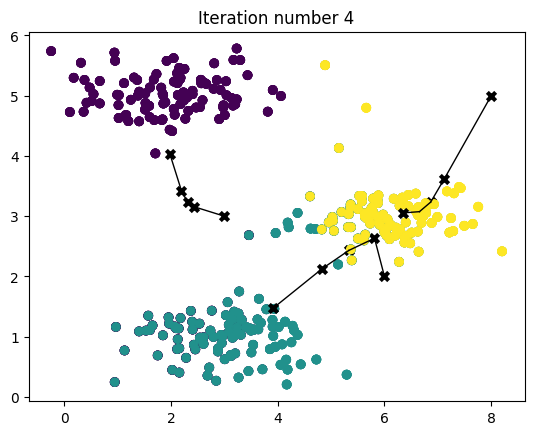

In [26]:
X = load_data()
initial_centroids = np.array([[3,3],[6,2], [8,5]])
K = 3
max_iters = 5
centroids, idx = run_kMeans(X, initial_centroids, max_iters, plot_progress=True)

In [28]:
def Kmeans_init_centroids(X,K):
    randidx = np.random.permutation(X.shape[0])
    centroids = X[randidx[:K]]
    return centroids

In [45]:
original_img = plt.imread('bird_small.png')

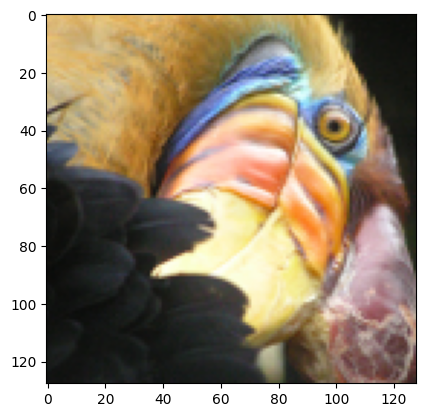

In [46]:
plt.imshow(original_img)

In [47]:
original_img.shape

(128, 128, 3)

In [48]:
original_img = original_img/255
X_img = np.reshape(original_img, (original_img.shape[0] * original_img.shape[1],3))
X_img

array([[0.00336794, 0.00276817, 0.00158401],
       [0.0035371 , 0.00284506, 0.00178393],
       [0.00347559, 0.00286044, 0.00169166],
       ...,
       [0.00099962, 0.00066128, 0.00059977],
       [0.00089196, 0.00056901, 0.00058439],
       [0.00079969, 0.00059977, 0.00052288]], dtype=float32)

In [54]:
K = 4
max_iters = 10

initial_centroids = Kmeans_init_centroids(X_img, K)

In [55]:
initial_centroids

array([[0.00232218, 0.00207612, 0.0012303 ],
       [0.00364475, 0.00344483, 0.00207612],
       [0.00027682, 0.00036909, 0.00032295],
       [0.00218378, 0.00195309, 0.00146098]], dtype=float32)

In [56]:
centroids, idx = run_kMeans(X_img, initial_centroids, max_iters)

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


In [57]:
X_recovered = centroids[idx,:]
X_recovered = np.reshape(X_recovered, original_img.shape)

array([[[0.00310589, 0.00249946, 0.0016371 ],
        [0.00310589, 0.00249946, 0.0016371 ],
        [0.00310589, 0.00249946, 0.0016371 ],
        ...,
        [0.00050177, 0.000509  , 0.00047156],
        [0.00050177, 0.000509  , 0.00047156],
        [0.00050177, 0.000509  , 0.00047156]],

       [[0.00310589, 0.00249946, 0.0016371 ],
        [0.00310589, 0.00249946, 0.0016371 ],
        [0.00310589, 0.00249946, 0.0016371 ],
        ...,
        [0.00050177, 0.000509  , 0.00047156],
        [0.00050177, 0.000509  , 0.00047156],
        [0.00050177, 0.000509  , 0.00047156]],

       [[0.00310589, 0.00249946, 0.0016371 ],
        [0.00310589, 0.00249946, 0.0016371 ],
        [0.00310589, 0.00249946, 0.0016371 ],
        ...,
        [0.00050177, 0.000509  , 0.00047156],
        [0.00050177, 0.000509  , 0.00047156],
        [0.00050177, 0.000509  , 0.00047156]],

       ...,

       [[0.00050177, 0.000509  , 0.00047156],
        [0.00050177, 0.000509  , 0.00047156],
        [0.00050177, 0

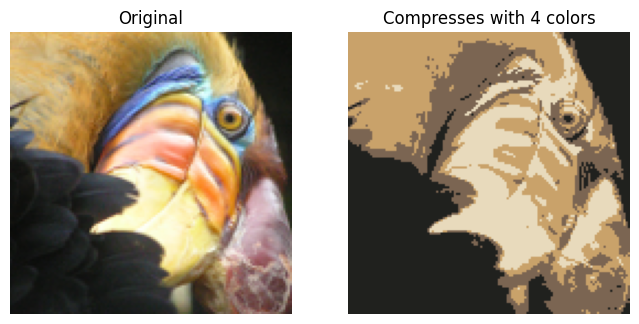

In [58]:
fig, ax = plt.subplots(1,2, figsize = (8,8))
plt.axis('off')

ax[0].imshow(original_img*255)
ax[0].set_title('Original')
ax[0].set_axis_off()

ax[1].imshow(X_recovered*255)
ax[1].set_title('Compresses with %d colors' %K)
ax[1].set_axis_off()